# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [277]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [278]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")
cities = [city.title() for city in cities]


Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [279]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    

        #Append the City information into city_data list
        city_info = ({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        city_data.append(city_info)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("----------------")
print("Data Loading Complete")
print("-----------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Grytviken
Processing Record 2 of Set 1 | Port-Aux-Francais
Processing Record 3 of Set 1 | Yellowknife
Processing Record 4 of Set 1 | Qujing
Processing Record 5 of Set 1 | Newman
Processing Record 6 of Set 1 | Gulf Shores
Processing Record 7 of Set 1 | Polyarnyy
Processing Record 8 of Set 1 | Adamstown
Processing Record 9 of Set 1 | El Vigia
Processing Record 10 of Set 1 | Bredasdorp
Processing Record 11 of Set 1 | George Town
Processing Record 12 of Set 1 | Pionerskiy
Processing Record 13 of Set 1 | Tiksi
Processing Record 14 of Set 1 | Melfort
Processing Record 15 of Set 1 | Thompson
Processing Record 16 of Set 1 | Ilulissat
Processing Record 17 of Set 1 | Vilhena
Processing Record 18 of Set 1 | Olonkinbyen
Processing Record 19 of Set 1 | Puerto Natales
Processing Record 20 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 21 of Set 1 | Waitangi
Processing Record 22 of Set 1 | Hengchun
Pr

In [280]:
# Convert the cities weather data into a Pandas DataFrame
#https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
city_data_df = pd.DataFrame(city_data)

#Update 'Date' column to standard time
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

#convert temperatures to Celsius
#https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/#:~:text=You%20can%20apply%20the%20lambda,x%3Ax%2D2)%20.

def kel_to_cel(x):
    return x-273.15
city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(kel_to_cel)
  

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [281]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grytviken,-54.2811,-36.5092,-6.34,69,8,3.30,GS,2023-08-09 18:07:20
1,Port-Aux-Francais,-49.3500,70.2167,2.38,77,33,11.50,TF,2023-08-09 18:07:21
2,Yellowknife,62.4560,-114.3525,18.76,47,10,7.07,CA,2023-08-09 18:07:21
3,Qujing,25.4833,103.7833,17.01,96,66,1.20,CN,2023-08-09 18:07:21
4,Newman,37.3138,-121.0208,27.35,10,0,0.88,US,2023-08-09 18:07:21


In [282]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [283]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Grytviken,-54.2811,-36.5092,-6.34,69,8,3.30,GS,2023-08-09 18:07:20
1,Port-Aux-Francais,-49.3500,70.2167,2.38,77,33,11.50,TF,2023-08-09 18:07:21
2,Yellowknife,62.4560,-114.3525,18.76,47,10,7.07,CA,2023-08-09 18:07:21
3,Qujing,25.4833,103.7833,17.01,96,66,1.20,CN,2023-08-09 18:07:21
4,Newman,37.3138,-121.0208,27.35,10,0,0.88,US,2023-08-09 18:07:21


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

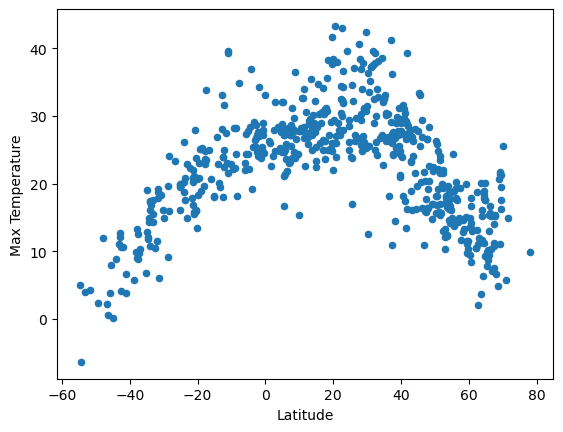

In [284]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

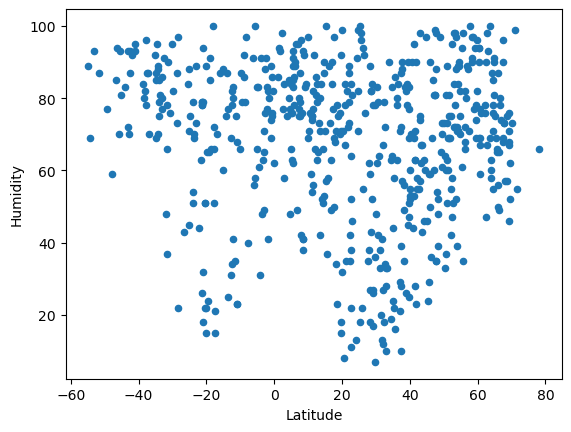

In [285]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

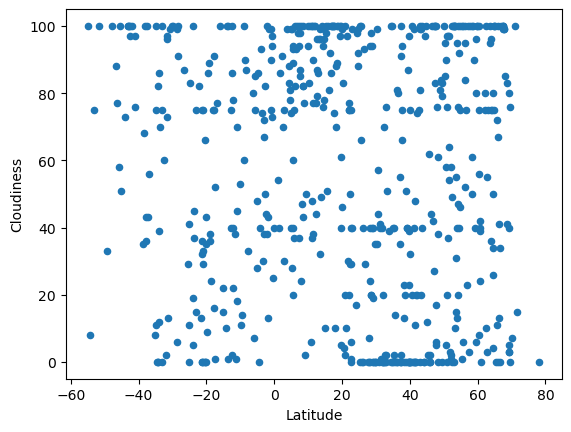

In [286]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

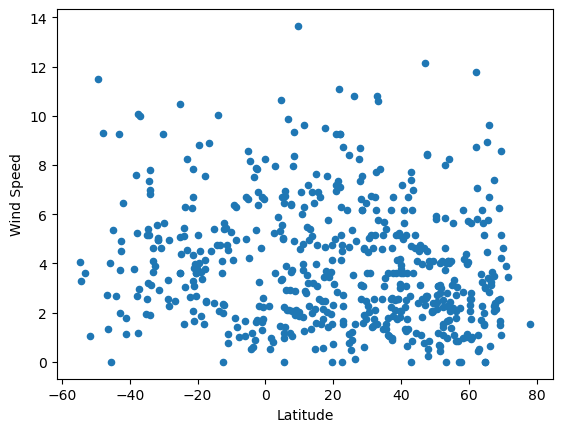

In [287]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [288]:
# Define a function to create Linear Regression plots

def lin_regress(x_values ,y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept 
    line_eq = f"y ={x_values}x + {intercept}" 
    plt.plot(x_values, regress_values, "r")

    

In [289]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

city_data_df = city_data_df.astype({'Lat':'float'})
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Yellowknife,62.4560,-114.3525,18.76,47,10,7.07,CA,2023-08-09 18:07:21
3,Qujing,25.4833,103.7833,17.01,96,66,1.20,CN,2023-08-09 18:07:21
4,Newman,37.3138,-121.0208,27.35,10,0,0.88,US,2023-08-09 18:07:21
5,Gulf Shores,30.2460,-87.7008,36.32,62,35,4.47,US,2023-08-09 18:07:21
6,Polyarnyy,69.1989,33.4478,21.69,67,3,1.68,RU,2023-08-09 18:07:22


In [290]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Grytviken,-54.2811,-36.5092,-6.34,69,8,3.30,GS,2023-08-09 18:07:20
1,Port-Aux-Francais,-49.3500,70.2167,2.38,77,33,11.50,TF,2023-08-09 18:07:21
7,Adamstown,-25.0660,-130.1015,19.49,71,41,10.47,PN,2023-08-09 18:06:19
9,Bredasdorp,-34.5322,20.0403,11.87,95,0,3.20,ZA,2023-08-09 18:04:13
16,Vilhena,-12.7406,-60.1458,33.12,31,40,3.60,BR,2023-08-09 18:04:16


###  Temperature vs. Latitude Linear Regression Plot

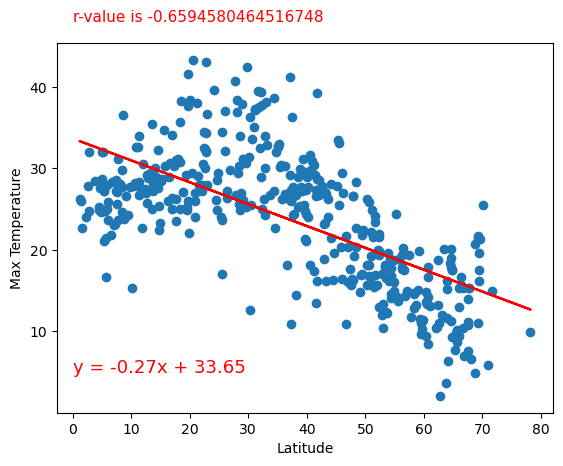

In [300]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#graphing scatter plot and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(0,48, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(0,5, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

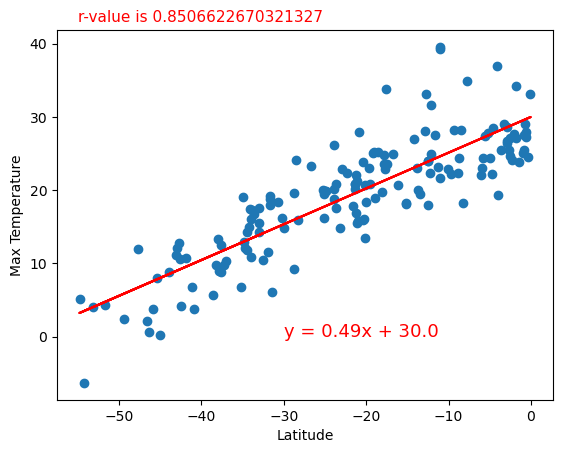

In [301]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")


#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(-55,43, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-30,0, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

**Discussion about the linear relationship:** 
These graphs show there is fairly strong correlation between the Latitude and Max Temperatures, with a strong r-value for both graphs. We can see that as locations get closer to the equator the temperature rises significantly and as the places get further away from the equator the temperature drops significantly. 

### Humidity vs. Latitude Linear Regression Plot

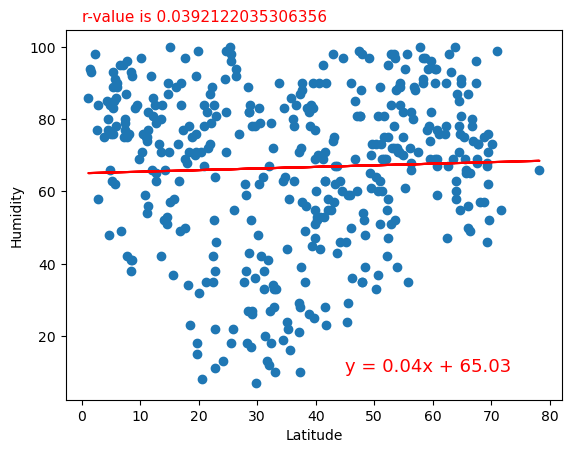

In [302]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(0,107, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(45,10, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

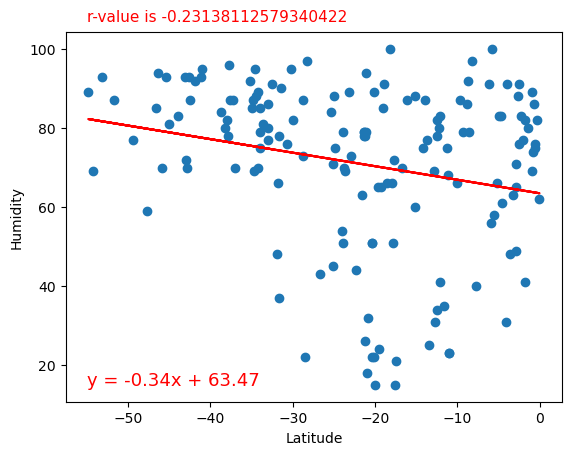

In [303]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-55,107, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-55,15, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

**Discussion about the linear relationship:** 
The regression line would indicate that there is very little correlation between latitude and humidity, as the r-values are very close to 0. Looking at the scatter plot it is interesting to note that there are still some patterns. For example it appears that cities close to the equator and far away from the equator tend to be drier, but cities between 20-30 degrees from the equator tend to be a little more humid. It would be interesting to only look at a subset of the data and see if there was a stronger correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

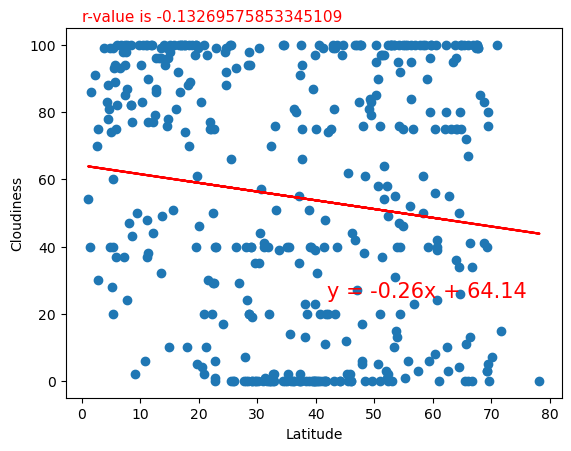

In [304]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(0,107, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(42,25, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=15, color='red')
plt.show()

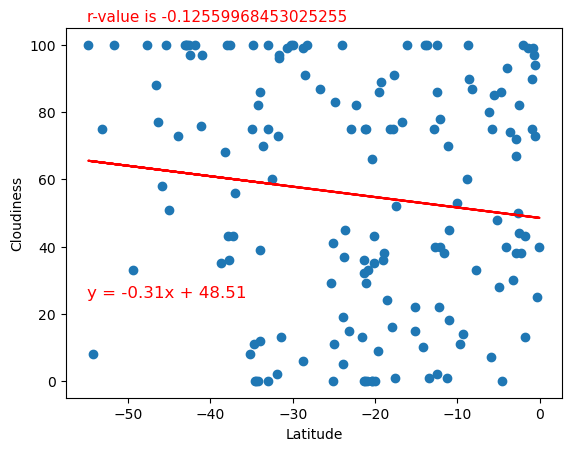

In [305]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55,107, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-55,25, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship:** 
These graphs show a very weak correlation between Cloudiness and Latitude, shown by the r-value that is close to 0.  

### Wind Speed vs. Latitude Linear Regression Plot

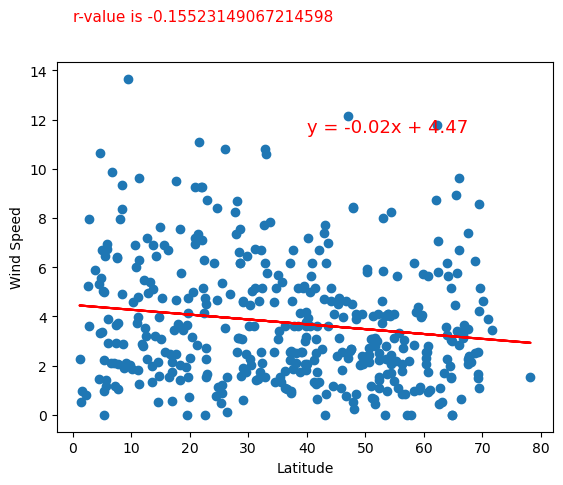

In [306]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(0,16, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(40,11.5, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

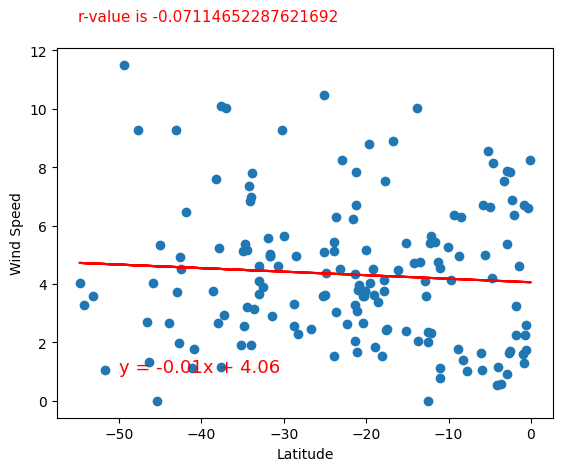

In [307]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-55,13, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-50,1, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

**Discussion about the linear relationship:** 
These graphs show a weak correlation between the Latitude and Wind Speed, shown by the r-value that is close to 0. 